<a href="https://colab.research.google.com/github/ErfanAsadi/Image-Proccessing/blob/main/filtering_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filter images in frequency domain

We are going to filter zebra image by convolving diffrent kind of filters (low pass, high pass) with diffrent diameters (10, 50, 100) and then we will calculate the PSNR of each image with the main image. <br />
At last we will filter zebra rgb image using guassian kernel.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pywt
import math
from scipy import fftpack

### Reading zebra image

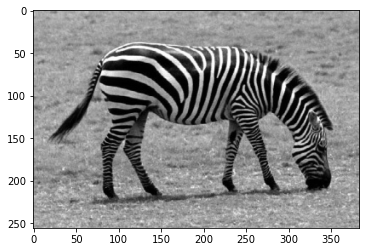

In [ ]:
img = cv.imread('zebra.JPG')
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

### Draw single function
A function to help us to draw different kind of high pass and low pass kernels easily.

In [ ]:
def draw_cicle(shape,diamiter):
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    center = np.array(TF.shape)/2.0
    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2
    return(TF)

### Calculting PSNR
We define a function which can calculate the psnr of to images.

In [ ]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

### Transform zebra image using fft 

In [ ]:
zebra_fft = fftpack.fftshift(fftpack.fft2(gray_image))

### Low pass and high pass filter with 10 pixel diameter filter
Now we are constructing circular low pass and high pass kernel.

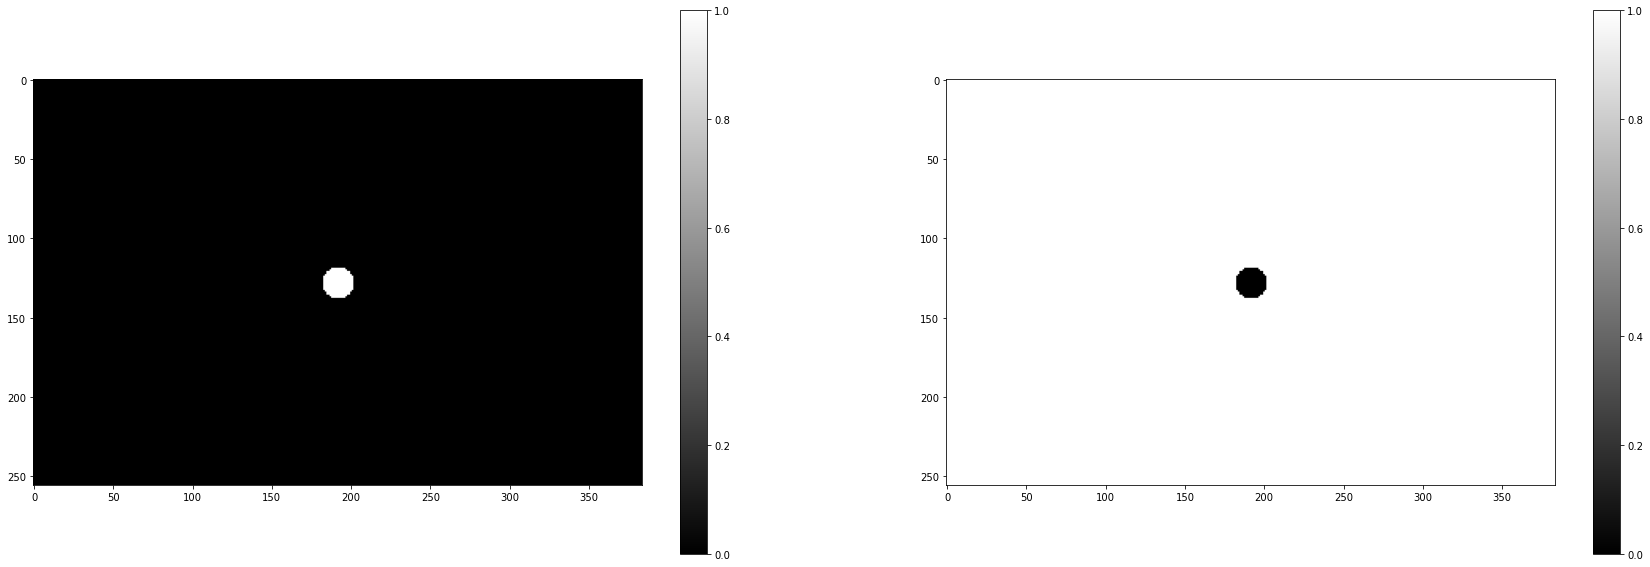

In [ ]:
shape = img.shape[:2]

TFcircleIN_10   = draw_cicle(shape=img.shape[:2],diamiter=10)
TFcircleOUT_10  = ~TFcircleIN_10

fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN_10,cmap="gray")
plt.colorbar(im)
ax  = fig.add_subplot(1,2,2)
im  = ax.imshow(TFcircleOUT_10,cmap="gray")
plt.colorbar(im)
plt.show()

### High pass filter

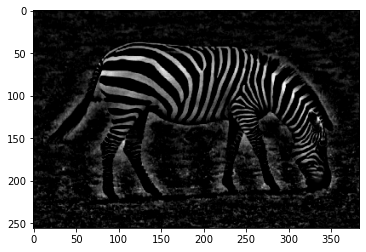

In [ ]:
high_pass_np=np.array(TFcircleOUT_10)

#multiply both the images
filtered=np.multiply(zebra_fft, high_pass_np)

#inverse fft
high_pass_reconstructed_zebra_10 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
high_pass_reconstructed_zebra_10 = np.maximum(0, np.minimum(high_pass_reconstructed_zebra_10, 255))
plt.imshow(high_pass_reconstructed_zebra_10, cmap="gray")

### Calculating PSNR

In [ ]:
psnr_result=psnr(gray_image, high_pass_reconstructed_zebra_10)
print('PSNR is: ', psnr_result)

PSNR is:  6.100270803537997


### Low pass filter

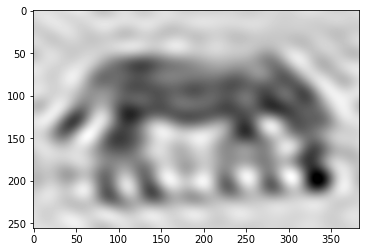

In [ ]:
low_pass_np = np.array(TFcircleIN_10)

# #multiply both the images
filtered1 = np.multiply(zebra_fft, low_pass_np)

#inverse fft
low_pass_reconstructed_zebra_10 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered1)))
low_pass_reconstructed_zebra_10 = np.maximum(0, np.minimum(low_pass_reconstructed_zebra_10, 255))
plt.imshow(low_pass_reconstructed_zebra_10, cmap="gray")

### Calculating PSNR

In [ ]:
psnr_result = psnr(gray_image, low_pass_reconstructed_zebra_10)
print('PSNR is: ', psnr_result)

PSNR is:  15.731803632682503


### Low pass and high pass filter with 50 pixel diameter filter
Now we are constructing circular low pass and high pass kernel.

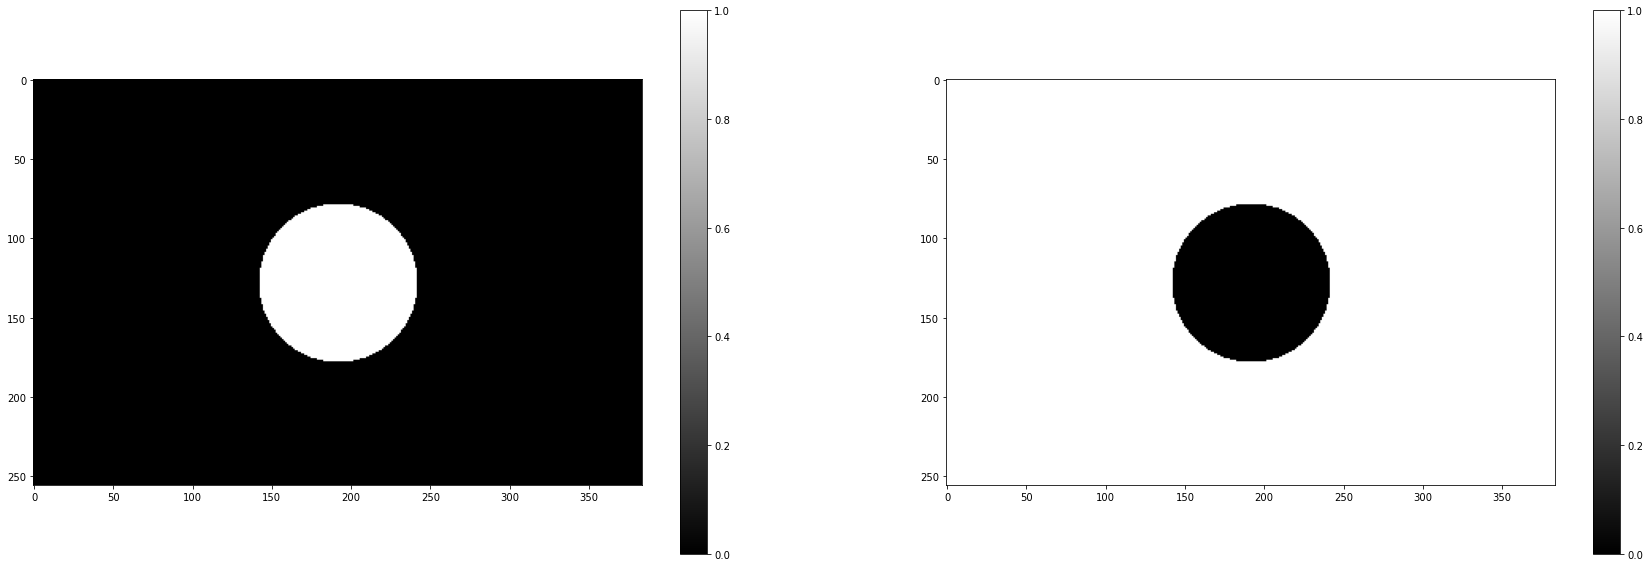

In [ ]:
shape = img.shape[:2]

TFcircleIN_50   = draw_cicle(shape=img.shape[:2],diamiter=50)
TFcircleOUT_50  = ~TFcircleIN_50

fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN_50,cmap="gray")
plt.colorbar(im)
ax  = fig.add_subplot(1,2,2)
im  = ax.imshow(TFcircleOUT_50,cmap="gray")
plt.colorbar(im)
plt.show()

### High pass filter

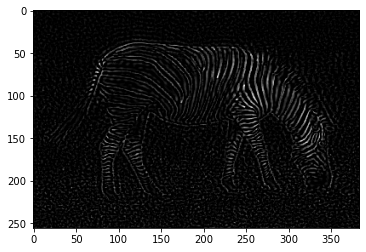

In [ ]:
high_pass_np=np.array(TFcircleOUT_50)

#multiply both the images
filtered=np.multiply(zebra_fft, high_pass_np)

#inverse fft
high_pass_reconstructed_zebra_50 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
high_pass_reconstructed_zebra_50 = np.maximum(0, np.minimum(high_pass_reconstructed_zebra_50, 255))
plt.imshow(high_pass_reconstructed_zebra_50, cmap="gray")

### Calculate PSNR

In [ ]:
psnr_result = psnr(gray_image, high_pass_reconstructed_zebra_50)
print('PSNR is: ', psnr_result)

PSNR is:  5.468346957497942


### Low pass filter 

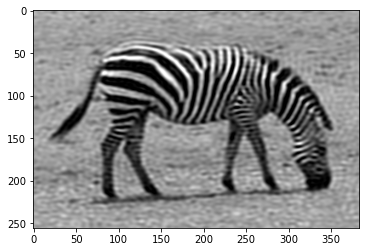

In [ ]:
low_pass_np = np.array(TFcircleIN_50)

# #multiply both the images
filtered = np.multiply(zebra_fft, low_pass_np)

#inverse fft
low_pass_reconstructed_zebra_50 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
low_pass_reconstructed_zebra_50 = np.maximum(0, np.minimum(low_pass_reconstructed_zebra_50, 255))
plt.imshow(low_pass_reconstructed_zebra_50, cmap="gray")

### Calculate PSNR

In [ ]:
psnr_result = psnr(gray_image, low_pass_reconstructed_zebra_50)
print('PSNR is: ', psnr_result)

PSNR is:  22.87516908014656


### Low pass and high pass filter with 10 pixel diameter filter
Now we are constructing circular low pass and high pass kernel.

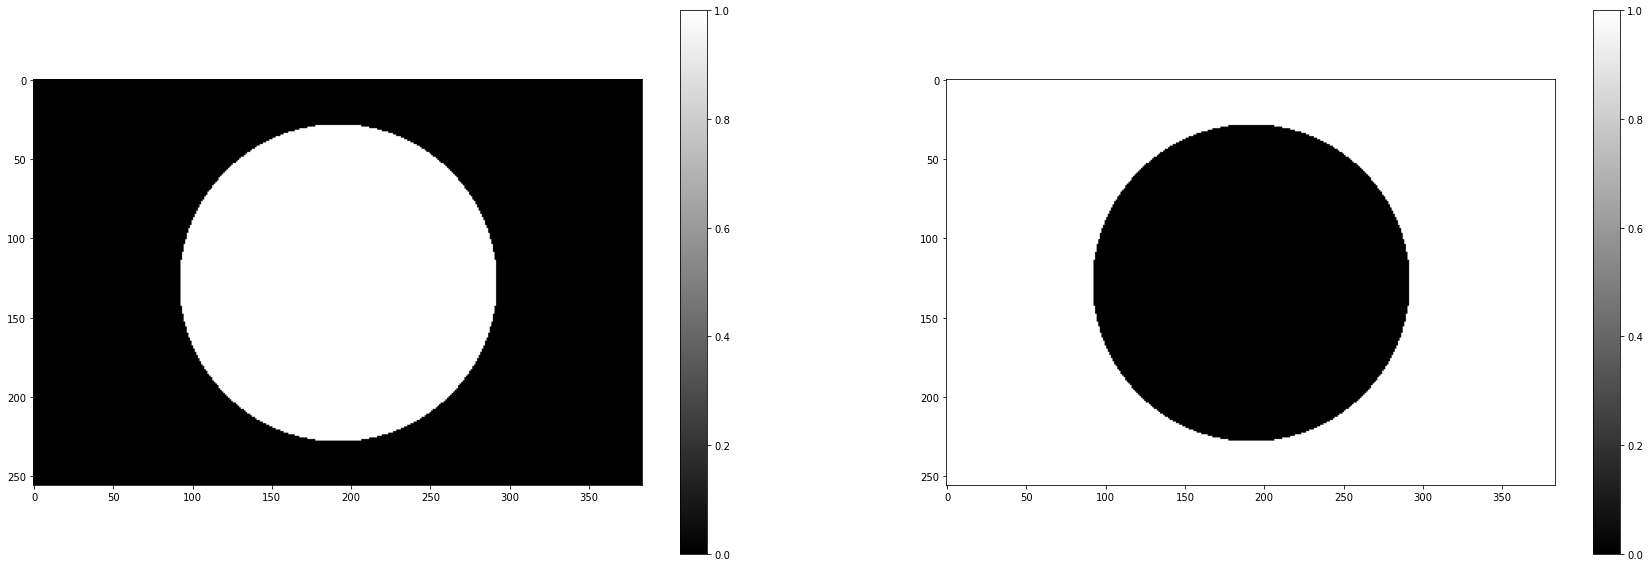

In [ ]:
shape = img.shape[:2]

TFcircleIN_100   = draw_cicle(shape=img.shape[:2],diamiter=100)
TFcircleOUT_100  = ~TFcircleIN_100

fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN_100,cmap="gray")
plt.colorbar(im)
ax  = fig.add_subplot(1,2,2)
im  = ax.imshow(TFcircleOUT_100,cmap="gray")
plt.colorbar(im)
plt.show()

### High pass filter

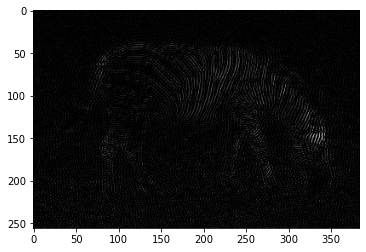

In [ ]:
high_pass_np=np.array(TFcircleOUT_100)

#multiply both the images
filtered=np.multiply(zebra_fft, high_pass_np)

#inverse fft
high_pass_reconstructed_zebra_100 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
high_pass_reconstructed_zebra_100 = np.maximum(0, np.minimum(high_pass_reconstructed_zebra_100, 255))
plt.imshow(high_pass_reconstructed_zebra_100, cmap="gray")

### Calculate PSNR

In [ ]:
psnr_result = psnr(gray_image, high_pass_reconstructed_zebra_100)
print('PSNR is: ', psnr_result)

PSNR is:  5.262483141965034


### Low pass filter

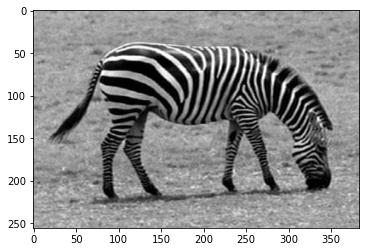

In [ ]:
low_pass_np = np.array(TFcircleIN_100)

# #multiply both the images
filtered1 = np.multiply(zebra_fft, low_pass_np)

#inverse fft
low_pass_reconstructed_zebra_100 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered1)))
low_pass_reconstructed_zebra_100 = np.maximum(0, np.minimum(low_pass_reconstructed_zebra_100, 255))
plt.imshow(low_pass_reconstructed_zebra_100, cmap="gray")

### calculate PSNR

In [ ]:
psnr_result = psnr(gray_image, low_pass_reconstructed_zebra_100)
print('PSNR is: ', psnr_result)

PSNR is:  30.39316641549485


### Guassian Filter in FFT

In [ ]:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

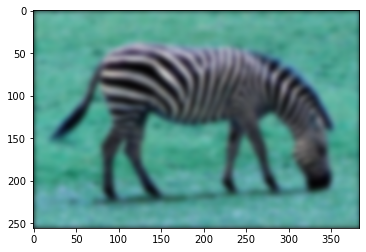

In [ ]:
from scipy import signal
# mode='same' is there to enforce the same output shape as input arrays
# (ie avoid border effects)
img3 = signal.fftconvolve(img, kernel[:, :, np.newaxis], mode='same')
plt.figure()
plt.imshow(img3.astype(int))